# Week 9-2 XOR Neural Network Modeling
#### Machine Learning with Python by idebtor@gmail.com

-----------------------------------

### 1.1 입력과 출력: XOR 데이터

In [2]:
import numpy as np
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y = np.array([[0, 1, 1, 0]])
print('X.shape={}. y.shape{}'.format(X.shape, y.shape))
print(X)
print(y)

X.shape=(2, 4). y.shape(1, 4)
[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


### 1.3 가중치: 행렬의 형상 구현

In [3]:
import numpy as np
n_x = X.shape[0]
n_y = y.shape[0]
n_h = 3
np.random.seed(1)
W1 = 2 * np.random.random((n_h, n_x)) - 1
W2 = 2 * np.random.random((n_y, n_h)) - 1
print("W1: {}".format(W1))
print("W2: {}".format(W2))

W1: [[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]]
W2: [[-0.62747958 -0.30887855 -0.20646505]]


# 2. XOR 신경망 구현

In [4]:
#%%writefile xor.py
# xor.py-A very simple neural network to do exclusive or.
# use WijT and column vector style data

import numpy as np

g = lambda x: 1/(1 + np.exp(-x))       # activation function
g_prime = lambda x: g(x) * (1 - g(x))   # derivative of sigmoid

epochs = 2000

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])                #=(1, 4),  but [0, 1, 1, 0].shape = (4, ) 

n_x = X.shape[0]
n_y = Y.shape[0]
n_h = 3

np.random.seed(1)
W1 = 2*np.random.random((n_h, n_x)) - 1
W2 = 2*np.random.random((n_y, n_h)) - 1  
print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))
print('n_x={}, n_h={}, n_y={}'.format(n_x, n_h, n_y))
print('W1.shape={}, W2.shape={}'.format(W1.shape, W2.shape))
cost_ = []

for i in range(epochs):
    A0 = X                             # unnecessary, but to illustrate only
    Z1 = np.dot(W1, A0)           # hidden layer input
    A1 = g(Z1)                        # hidden layer output
    Z2 = np.dot(W2, A1)           # output layer input
    A2 = g(Z2)                        # output layer results
    
    E2 = Y - A2                       # error @ output
    E1 = np.dot(W2.T, E2)          # error @ hidden
    if i == 0:
        print('E1.shape={}, E2.shape={}'.format(E1.shape, E2.shape))

    dZ2 = E2 * g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
    dZ1 = E1 * g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  
    
    W2 +=  np.dot(dZ2, A1.T)     # update output layer weights
    W1 +=  np.dot(dZ1, A0.T)       # update hidden layer weights
    cost_.append(np.sum(E2 * E2))

print('fit returns A2:', A2)

print("Final prediction of all")
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

#### Plotting Error Squared Sum (1)

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(range(len(cost_)), cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

In [5]:
import numpy as np

g = lambda x: 1/(1 + np.exp(-x))       # activation function
g_prime = lambda x: g(x) * (1 - g(x))   # derivative of sigmoid

epochs = 2000

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])                #=(1, 4),  but [0, 1, 1, 0].shape = (4, ) 

n_x = X.shape[0]
n_y = Y.shape[0]
n_h = 4

np.random.seed(1)
W1 = 2*np.random.random((n_h, n_x)) - 1
W2 = 2*np.random.random((n_y, n_h)) - 1  
print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))
print('n_x={}, n_h={}, n_y={}'.format(n_x, n_h, n_y))
print('W1.shape={}, W2.shape={}'.format(W1.shape, W2.shape))
cost_ = []

for i in range(epochs):
    A0 = X                             # unnecessary, but to illustrate only
    Z1 = np.dot(W1, A0)           # hidden layer input
    A1 = g(Z1)                        # hidden layer output
    Z2 = np.dot(W2, A1)           # output layer input
    A2 = g(Z2)                        # output layer results
    
    E2 = Y - A2                       # error @ output
    E1 = np.dot(W2.T, E2)          # error @ hidden
    if i == 0:
        print('E1.shape={}, E2.shape={}'.format(E1.shape, E2.shape))

    dZ2 = E2 * g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
    dZ1 = E1 * g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  
    
    W2 +=  np.dot(dZ2, A1.T)     # update output layer weights
    W1 +=  np.dot(dZ1, A0.T)       # update hidden layer weights
    cost_.append(np.sum(E2 * E2))

print('fit returns A2:', A2)

print("Final prediction of all")
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

X.shape=(2, 4), Y.shape(1, 4)
n_x=2, n_h=4, n_y=1
W1.shape=(4, 2), W2.shape=(1, 4)
E1.shape=(4, 4), E2.shape=(1, 4)
fit returns A2: [[0.04991864 0.95753054 0.96062609 0.02878981]]
Final prediction of all
[0 0] [0.05]
[0 1] [0.958]
[1 0] [0.961]
[1 1] [0.029]


#### Plotting Error Squared Sum (2)

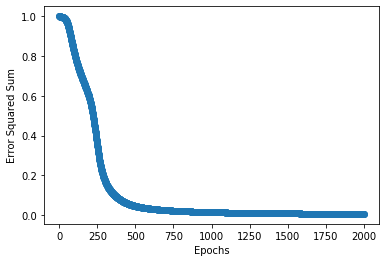

In [6]:
import matplotlib.pyplot as plt 

plt.plot(range(len(cost_)), cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

-------
_Rejoice always, pray continually, give thanks in all circumstances; for this is God’s will for you in Christ Jesus. (1 Thes 5:16-18)_